# Analysing topic model evaluation metrics

In [1]:
%load_ext autoreload
%autoreload 2

import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import manifold
from sklearn.preprocessing import MinMaxScaler

from itertools import combinations
from itertools import chain

metric_names = ['c_npmi', 'c_uci', 'c_v', 'c_w2v', 'perplexity', 'u_mass']
param_names = ['alpha', 'beta', 'num_topics']

### Load saved metrics

In [2]:
with open('../data/lee-metrics.json') as f:
    models = json.load(f)

df = pd.DataFrame(models)
df.head()

,alpha,beta,c_npmi,c_uci,c_v,c_w2v,modelId,num_topics,perplexity,u_mass
0,0.01,0.01,-0.003759,-1.836443,0.449097,0.998317,0.01-0.01-5,5,-6.246609,-2.393090
1,0.01,0.01,-0.037455,-2.854046,0.470005,0.998850,0.01-0.01-10,10,-6.302226,-2.233028
2,0.01,0.01,-0.059600,-3.329506,0.433467,0.998933,0.01-0.01-15,15,-6.363658,-2.439774
3,0.01,0.01,-0.075871,-3.677816,0.412369,0.998767,0.01-0.01-20,20,-6.402373,-2.509307
4,0.01,0.10,-0.008113,-2.012630,0.449335,0.998327,0.01-0.1-5,5,-6.038808,-2.413199


### Add ranks of absolute metric values

In [3]:
metric_names_with_ranks = [m + '-rank' for m in metric_names]
df[metric_names_with_ranks] = df[metric_names].rank()
df['mean_rank'] = df[metric_names_with_ranks].mean(axis=1)
df['best_rank'] = df[metric_names_with_ranks].max(axis=1)
df.head()

,alpha,beta,c_npmi,c_uci,c_v,c_w2v,modelId,num_topics,perplexity,u_mass,c_npmi-rank,c_uci-rank,c_v-rank,c_w2v-rank,perplexity-rank,u_mass-rank,mean_rank,best_rank
0,0.01,0.01,-0.003759,-1.836443,0.449097,0.998317,0.01-0.01-5,5,-6.246609,-2.393090,58.0,46.0,42.0,13.0,34.0,32.0,37.500000,58.0
1,0.01,0.01,-0.037455,-2.854046,0.470005,0.998850,0.01-0.01-10,10,-6.302226,-2.233028,40.0,32.0,59.0,40.0,24.0,41.0,39.333333,59.0
2,0.01,0.01,-0.059600,-3.329506,0.433467,0.998933,0.01-0.01-15,15,-6.363658,-2.439774,24.0,24.0,36.0,51.0,20.0,20.0,29.166667,51.0
3,0.01,0.01,-0.075871,-3.677816,0.412369,0.998767,0.01-0.01-20,20,-6.402373,-2.509307,17.0,16.0,26.0,31.0,18.0,14.0,20.333333,31.0
4,0.01,0.10,-0.008113,-2.012630,0.449335,0.998327,0.01-0.1-5,5,-6.038808,-2.413199,54.0,40.5,43.5,15.0,56.0,24.0,38.833333,56.0


### Project metrics into 2D space, color with mean rank

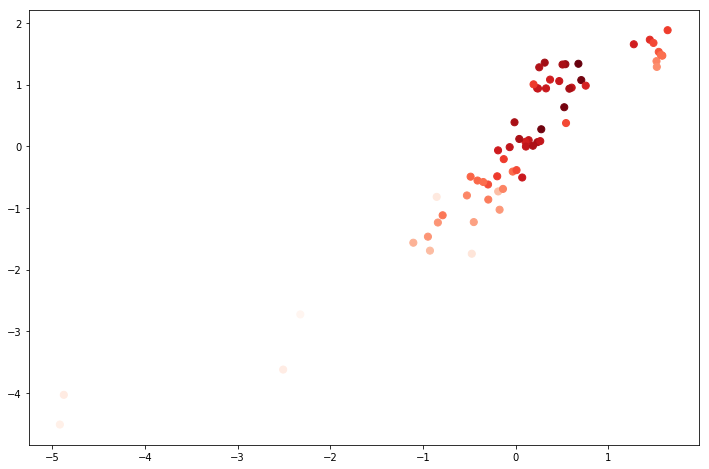

In [4]:
coords = manifold.MDS(random_state=0).fit_transform(df[metric_names].values)
plt.figure(figsize=(12,8))
plt.scatter(coords[:,0], coords[:,1], s=50, c=df['mean_rank'], cmap='Reds')

In [5]:
df['coords'] = [tuple(c) for c in coords]
df.head()

,alpha,beta,c_npmi,c_uci,c_v,c_w2v,modelId,num_topics,perplexity,u_mass,c_npmi-rank,c_uci-rank,c_v-rank,c_w2v-rank,perplexity-rank,u_mass-rank,mean_rank,best_rank,coords
0,0.01,0.01,-0.003759,-1.836443,0.449097,0.998317,0.01-0.01-5,5,-6.246609,-2.393090,58.0,46.0,42.0,13.0,34.0,32.0,37.500000,58.0,"(0.3720094116386934, 1.0813155164851458)"
1,0.01,0.01,-0.037455,-2.854046,0.470005,0.998850,0.01-0.01-10,10,-6.302226,-2.233028,40.0,32.0,59.0,40.0,24.0,41.0,39.333333,59.0,"(0.14137494692934932, 0.09896665164380562)"
2,0.01,0.01,-0.059600,-3.329506,0.433467,0.998933,0.01-0.01-15,15,-6.363658,-2.439774,24.0,24.0,36.0,51.0,20.0,20.0,29.166667,51.0,"(-0.030944209549874563, -0.41066023082349745)"
3,0.01,0.01,-0.075871,-3.677816,0.412369,0.998767,0.01-0.01-20,20,-6.402373,-2.509307,17.0,16.0,26.0,31.0,18.0,14.0,20.333333,31.0,"(-0.18770663843033739, -0.7328761349069081)"
4,0.01,0.10,-0.008113,-2.012630,0.449335,0.998327,0.01-0.1-5,5,-6.038808,-2.413199,54.0,40.5,43.5,15.0,56.0,24.0,38.833333,56.0,"(0.24179321371597312, 0.9375419394649214)"


### Look at Spearman correlation between the metrics

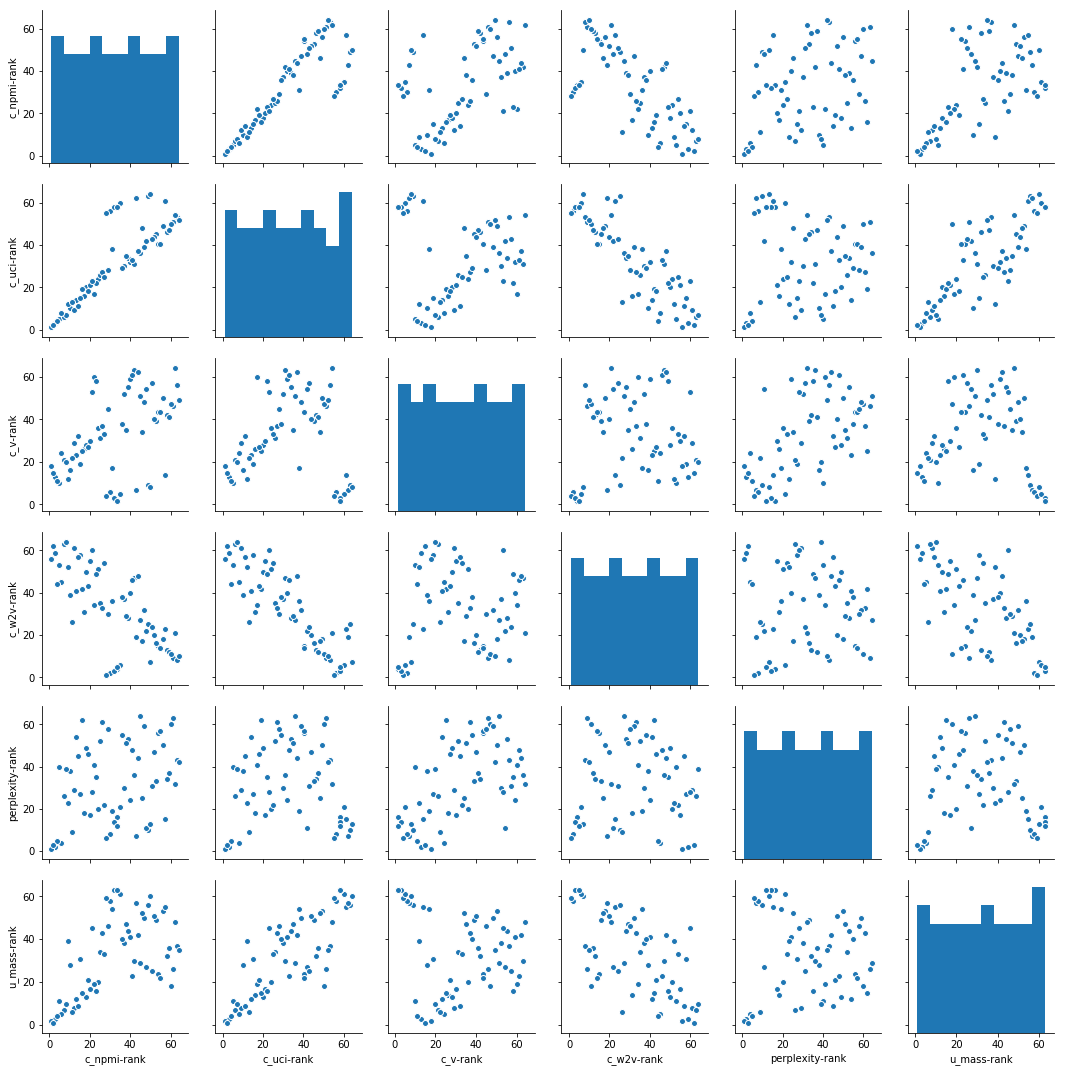

In [6]:
sns.pairplot(df[metric_names_with_ranks])

Some are correlated, most are not. Let's look at the values.

In [7]:
df[metric_names].corr('spearman')

,c_npmi,c_uci,c_v,c_w2v,perplexity,u_mass
c_npmi,1.000000,0.842938,0.480465,-0.717705,0.328804,0.566836
c_uci,0.842938,1.000000,0.040365,-0.863946,0.011470,0.820094
c_v,0.480465,0.040365,1.000000,0.045285,0.564047,-0.102159
c_w2v,-0.717705,-0.863946,0.045285,1.000000,-0.042628,-0.653372
perplexity,0.328804,0.011470,0.564047,-0.042628,1.000000,-0.043363
u_mass,0.566836,0.820094,-0.102159,-0.653372,-0.043363,1.000000


### Subgroup correlation analysis

In [8]:
def compute_corr_group(df, param):
    '''
    Group the dataframe by the given param and perform correlation.
    Return an array of objects:
    - condition: [(param, value)]
    - variables: (var1, var2)
    - coeff: correlation coefficient
    - diff: difference between the coefficient of the entire dataset and the group
    '''
    results = []
    gloabl_corr_df = df[metric_names].corr('spearman')
    for k, g in df.groupby(param):
        corr_df = g[metric_names].corr('spearman')
        
        for var1, var2 in combinations(metric_names, 2):
            results.append({ 
                'condition': [(param, float(k))],
                'variables': (var1, var2),
                'coeff': corr_df[var1][var2],
                'diff': corr_df[var1][var2] - gloabl_corr_df[var1][var2]
            })

    return results

In [9]:
def compute_overall_corr(df):
    results = []
    corr_df = df[metric_names].corr('spearman')

    for var1, var2 in combinations(metric_names, 2):
        results.append({ 
            'condition': None,
            'variables': (var1, var2),
            'coeff': corr_df[var1][var2],
            'diff': 0
        })

    return results

In [10]:
all_corrs = list(chain.from_iterable([compute_corr_group(df, param) for param in param_names]))
all_corrs = list(chain.from_iterable([all_corrs, compute_overall_corr(df)]))
corr_df = pd.DataFrame(all_corrs)
corr_df.head()

,coeff,condition,diff,variables
0,0.982353,"[(alpha, 0.01)]",0.139415,"(c_npmi, c_uci)"
1,0.729412,"[(alpha, 0.01)]",0.248947,"(c_npmi, c_v)"
2,-0.817647,"[(alpha, 0.01)]",-0.099942,"(c_npmi, c_w2v)"
3,0.305882,"[(alpha, 0.01)]",-0.022922,"(c_npmi, perplexity)"
4,0.608824,"[(alpha, 0.01)]",0.041987,"(c_npmi, u_mass)"


Which correlation value is the highest?

In [11]:
corr_df.sort_values('coeff', ascending=False).head(10)

,coeff,condition,diff,variables
15,1.000000,"[(alpha, 0.1)]",0.157062,"(c_npmi, c_uci)"
60,0.994118,"[(beta, 0.01)]",0.151180,"(c_npmi, c_uci)"
0,0.982353,"[(alpha, 0.01)]",0.139415,"(c_npmi, c_uci)"
165,0.982353,"[(num_topics, 20.0)]",0.139415,"(c_npmi, c_uci)"
150,0.979412,"[(num_topics, 15.0)]",0.136474,"(c_npmi, c_uci)"
75,0.958058,"[(beta, 0.1)]",0.115120,"(c_npmi, c_uci)"
53,0.943787,"[(alpha, 10.0)]",0.123693,"(c_uci, u_mass)"
158,0.941176,"[(num_topics, 15.0)]",0.121083,"(c_uci, u_mass)"
38,0.935294,"[(alpha, 1.0)]",0.115200,"(c_uci, u_mass)"
48,0.919794,"[(alpha, 10.0)]",0.590990,"(c_npmi, perplexity)"


Which correlation increasing the most from the global one?

In [12]:
corr_df.sort_values('diff', ascending=False).head(10)

,coeff,condition,diff,variables
71,0.814706,"[(beta, 0.01)]",0.916865,"(c_v, u_mass)"
65,0.852941,"[(beta, 0.01)]",0.812576,"(c_uci, c_v)"
80,0.846834,"[(beta, 0.1)]",0.806469,"(c_uci, c_v)"
86,0.685799,"[(beta, 0.1)]",0.787958,"(c_v, u_mass)"
59,0.705018,"[(alpha, 10.0)]",0.748381,"(perplexity, u_mass)"
144,0.785294,"[(num_topics, 10.0)]",0.740009,"(c_v, c_w2v)"
74,0.691176,"[(beta, 0.01)]",0.734539,"(perplexity, u_mass)"
52,0.737466,"[(alpha, 10.0)]",0.725996,"(c_uci, perplexity)"
89,0.647059,"[(beta, 0.1)]",0.690422,"(perplexity, u_mass)"
67,0.700000,"[(beta, 0.01)]",0.688530,"(c_uci, perplexity)"


### Subgroup mean ranking

In [13]:
def compute_group_rank(df, params):
    '''
    Group the dataframe by the given params and compute the average rank of a group's elements.
    Return an array of objects:
    - condition: [(param, value)]
    - mean_rank, best_rank, individual metrics: the average rank
    '''
    results = []
    all_metrics = metric_names_with_ranks + ['mean_rank', 'best_rank']
    
    for k, g in df.groupby(params):
        result = { 'condition': list(zip(params, [float(x) for x in k])) if type(params) == tuple else [(params, float(k))] }

        for m in all_metrics:
            result[m.replace('-rank', '')] = g[m].mean()
        
        results.append(result)

    return results

In [14]:
single_groups = list(chain.from_iterable([compute_group_rank(df, param) for param in param_names]))
double_groups = list(chain.from_iterable([compute_group_rank(df, param) for param in combinations(param_names, 2)]))
triple_groups = list(chain.from_iterable([compute_group_rank(df, param) for param in combinations(param_names, 3)]))
all_ranks = list(chain.from_iterable([single_groups, double_groups, triple_groups]))
rank_df = pd.DataFrame(all_ranks)
rank_df.head()

,best_rank,c_npmi,c_uci,c_v,c_w2v,condition,mean_rank,perplexity,u_mass
0,54.8125,32.6875,28.53125,38.84375,31.7500,"[(alpha, 0.01)]",33.927083,44.8750,26.8750
1,55.7500,34.4375,29.84375,37.53125,35.3125,"[(alpha, 0.1)]",35.083333,42.0625,31.3125
2,59.0000,36.0000,35.43750,34.43750,38.7500,"[(alpha, 1.0)]",35.583333,31.3125,37.5625
3,56.1250,26.8750,36.18750,19.18750,24.1875,"[(alpha, 10.0)]",25.406250,11.7500,34.2500
4,54.5625,28.3750,24.12500,36.25000,41.3750,"[(beta, 0.01)]",29.041667,21.5000,22.6250


Which grouping has the highest mean rank?

In [15]:
rank_df.sort_values('mean_rank', ascending=False).head(30)

,best_rank,c_npmi,c_uci,c_v,c_w2v,condition,mean_rank,perplexity,u_mass
116,64.0000,62.0000,54.0000,64.0000,21.00,"[(alpha, 10.0), (beta, 1.0), (num_topics, 5.0)]",46.833333,32.000,48.00
101,62.0000,44.0000,37.0000,62.0000,48.00,"[(alpha, 1.0), (beta, 1.0), (num_topics, 10.0)]",46.166667,44.000,42.00
100,56.0000,56.0000,49.0000,50.0000,18.00,"[(alpha, 1.0), (beta, 1.0), (num_topics, 5.0)]",46.000000,50.000,53.00
85,59.0000,47.0000,39.0000,48.0000,32.00,"[(alpha, 0.1), (beta, 1.0), (num_topics, 10.0)]",45.833333,59.000,50.00
52,60.7500,59.7500,51.0000,51.7500,14.75,"[(beta, 1.0), (num_topics, 5.0)]",44.125000,51.250,36.25
72,63.0000,63.0000,53.0000,56.0000,8.00,"[(alpha, 0.01), (beta, 10.0), (num_topics, 5.0)]",43.333333,43.000,37.00
68,63.0000,61.0000,51.0000,46.0000,9.00,"[(alpha, 0.01), (beta, 1.0), (num_topics, 5.0)]",42.666667,63.000,26.00
96,52.0000,52.0000,44.0000,40.0000,20.00,"[(alpha, 1.0), (beta, 0.1), (num_topics, 5.0)]",42.333333,47.000,51.00
65,55.0000,39.0000,34.0000,55.0000,28.00,"[(alpha, 0.01), (beta, 0.1), (num_topics, 10.0)]",42.166667,53.000,44.00
69,64.0000,45.0000,36.0000,51.0000,27.00,"[(alpha, 0.01), (beta, 1.0), (num_topics, 10.0)]",42.000000,64.000,29.00


### Export data

In [16]:
with open('../data/lee-analysis-metrics.json', 'w') as f:
    data = {
        'metrics': df.to_dict('records'),
        'correlations': corr_df.to_dict('records'),
        'ranks': rank_df.to_dict('records')
    }
    
    json.dump(data, f)